## Projek Sederhana Dalam Prediksi Kekuatan kata sandi facebook dengan NLP 🤨 🧐 
### 1. Business Understanding 😇 
Projek kali ini aku iseng untuk mencoba mengenai NLP atau Natural Language Processing dengan melakukan projek sederhana yaitu klasifikasi atau prediksi kekuatan dari kata sandi dengan menggunakan dataset dari kata sandi facebook yang sudah dilabeli. Seperti yang diketahui bahwa password atau sandi merupakan sesuatu yang privasi 😱😱. Kita sebagai seorang data scientist ingin membantu para pengguna dalam mengamankan kata sandi yang mereka buat supaya kata sandi mereka tidak terlalu mudah ditebak baik oleh orang maupun suatu program. Maka dari itu salah satu solusinya yaitu memberi tahu kepada pengguna bahwa kekuatan dari sandi mereka lemah atau sudah kuat. Jika lemah artinya sandi tersebut perlu diperbaiki lagi. Lesgoo 🫡🫡


### 2. Data Understanding 😁
Dataset ini berisikan 100 ribu data mengenai password dari berbagai akun yang mungkin sudah tidak aktif atau sudah tidak digunakan. Dataset tersebut berisikan fitu:
- index: primary key atau id unik
- password: berisikan teks password
- strength: label yang menandakan seberapa kuat password (0 = lemah, 1 = sedang, 2 = kuat)


### 3. Data Preparation: 
- Cleaning data
- Feature Engineering 😢
- feature importance
- tf-idf


### 4. Modelling 😨 😰
- Logistic Regression
- Logistic Regression CV
- Random Forest Classifier


### 5. Evaluation 🧐 🤓 😎
- accuracy
- recall
- f1-score
- precision

In [1]:
from pyforest import *
import sqlite3
import warnings

warnings.filterwarnings('ignore')
plt.ioff()

<IPython.core.display.Javascript object>

In [2]:
koneksi = sqlite3.connect(r"C:/Users/Asus/dataset/pasword/password_data.sqlite")

In [3]:
kueri = '''
SELECT *
FROM Users
'''
data = pd.read_sql_query(kueri, koneksi)

<IPython.core.display.Javascript object>

In [4]:
data.head(5)

,index,password,strength
0,0,zxe870819,1
1,1,xw46454nr23l,1
2,2,soporte13,1
3,3,accounts6000webhost.com,2
4,4,c443balg,1


#### Cleaning data

In [5]:
data.drop('index', axis=1, inplace=True)

In [6]:
data.duplicated().sum()

0

In [7]:
data.isnull().any().sum()

0

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   password  100000 non-null  object
 1   strength  100000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 1.5+ MB


In [9]:
data['strength'].unique()

array([1, 2, 0], dtype=int64)

merupakan data ordinal??

#### analisis
1. Berapa banyak teks password yang hanya mengandung karakter angka?
2. Berapa banyak teks password yang hanya mengandung karakter Kapital? (Upper case)
3. Berapa banyak teks password yang hanya mengandung karakter alpa numerik?
4. Berapa banyak teks password yang hanya mengandung karakter title case atau kapital di huruf pertama?
5. Berapa banyak teks password yang mengandung beberapa karakter spesial?

In [10]:
data.columns

Index(['password', 'strength'], dtype='object')

In [11]:
type(data['password'][293])

str

pakai fungsi yang cocok untuk tipe data string atau aksesor str

1. teks password yang hanya mengandung karakter angka

In [12]:
data['password'].str.isnumeric().sum()

26

In [13]:
data[data['password'].str.isnumeric()] #jadi dataframe

,password,strength
12280,943801,0
14992,12345,0
20958,147856,0
21671,140290,0
23269,123987,0
28569,1233214,0
31329,0159456,0
32574,363761,0
37855,4524344,0
43648,5521597,0


2. teks password yang hanya mengandung karakter Kapital

In [14]:
data['password'].str.isupper().sum()

1506

In [15]:
data[data['password'].str.isupper()]

,password,strength
115,EYT63119,1
273,INSPIRON6,1
338,1A2S3D4F,1
367,13269123A,1
373,YAMAZAKI82,1
...,...,...
99590,V13000993J,1
99692,65925013ABC,1
99784,01EDD055,1
99893,1UPONYOU,1


3. teks password yang hanya mengandung karakter alpa numerik

In [16]:
data['password'].str.isalpha().sum()

50

In [17]:
# isalpha itu hanya alfabet saja
data[data['password'].str.isalpha()].head(10)

,password,strength
267,PomarancaÇ,1
1380,smgodt,0
3198,cuado,0
4560,jelsz,0
6380,demsxp,0
7803,secret,0
9218,caballo,0
11555,mhe,0
11667,kreedo,0
13645,nõmlich,0


In [18]:
data['password'].str.isalnum().sum()

97203

In [19]:
# kalau isalnum atau isalpha numerik itu hanya alfabet dan angka terkandung
data[data['password'].str.isalnum()].head(10)

,password,strength
0,zxe870819,1
1,xw46454nr23l,1
2,soporte13,1
4,c443balg,1
5,16623670p,1
6,yj9q3f8p,1
7,180ZIRUVIcuFERy,2
8,djredd09,1
9,yin172015,1
10,bodrum1903,1


4. teks password yang hanya mengandung karakter title case

In [20]:
data['password'].str.istitle().sum()

932

In [21]:
data[data['password'].str.istitle()]

,password,strength
64,Hisanthoshjasika0,2
242,Therockrockbottom72,2
338,1A2S3D4F,1
367,13269123A,1
526,Csicskarozsika1,2
...,...,...
99168,1053815198M,1
99192,Alfranx05122023,2
99375,Kensington1956,2
99590,V13000993J,1


5. teks password yang mengandung beberapa karakter spesial seperti (.), (,), dll

In [22]:
# library untuk mengolah string
import string

In [23]:
# fungsi untukk mengetahui karakter spesial, jadi udah tau kalau yg bakal diolah itu str
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [24]:
# fungsi untuk deteksi pasword yg ada karakter spesial
def cari_spesial(baris):
    for karakter in baris:
        if karakter in string.punctuation:
            return 1
        else:
            pass

In [25]:
data[data['password'].apply(cari_spesial)==1]

,password,strength
3,accounts6000webhost.com,2
68,12463773800+,1
98,p.r.c.d.g.,1
145,cita-cita,1
180,karolina.susnina0U,2
...,...,...
99748,maiselis.com,1
99845,hosting4meze!@#,2
99954,semista_bakung15,2
99980,halflife2010!LEB,2


#### Feature engineering 
yang dihitung untuk prediksi kekuatan password:
1. panjang dari password (length)
2. frekuensi dari lower case
3. frekuensi dari upper case
4. frekuensi dari karakter numerik
5. frekuensi dari spesial karakter

In [26]:
data['password'].str.len()

0         9
1        12
2         9
3        23
4         8
         ..
99995    10
99996    10
99997     9
99998     9
99999    11
Name: password, Length: 100000, dtype: int64

In [27]:
data['length'] = data['password'].str.len()

In [28]:
# list comprehensionn
password = 'crnogorac381PG'

[char for char in password if char.islower()]

['c', 'r', 'n', 'o', 'g', 'o', 'r', 'a', 'c']

In [29]:
len([char for char in password if char.islower()])

9

In [30]:
len([char for char in password if char.islower()])/len(password)

# kita terapin ini ke setiap baris data melalui fungsi

0.6428571428571429

In [31]:
def frekuensi_lower(baris):
    return len([char for char in baris if char.islower()])/len(baris)

In [32]:
def frekuensi_upper(baris):
    return len([char for char in baris if char.isupper()])/len(baris)

In [33]:
def frekuensi_numerik(baris):
    return len([char for char in baris if char.isdigit()])/len(baris)

In [34]:
data['password'].apply(frekuensi_lower)

0        0.333333
1        0.416667
2        0.777778
3        0.782609
4        0.625000
           ...   
99995    0.700000
99996    0.800000
99997    0.777778
99998    0.666667
99999    0.727273
Name: password, Length: 100000, dtype: float64

In [35]:
data['frek_lower'] = np.round(data['password'].apply(frekuensi_lower), 3)

data['frek_upper'] = np.round(data['password'].apply(frekuensi_upper), 3)

data['frek_numerik'] = np.round(data['password'].apply(frekuensi_numerik), 3)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [36]:
data.head(5)

,password,strength,length,frek_lower,frek_upper,frek_numerik
0,zxe870819,1,9,0.333,0.0,0.667
1,xw46454nr23l,1,12,0.417,0.0,0.583
2,soporte13,1,9,0.778,0.0,0.222
3,accounts6000webhost.com,2,23,0.783,0.0,0.174
4,c443balg,1,8,0.625,0.0,0.375


In [37]:
def frekuensi_spesial(baris):
    spesial_chars = []
    for char in baris:
        if not char.isalpha() and not char.isdigit():
            spesial_chars.append(char)
    return len(spesial_chars)

jadi untuk setiap baris yang tidak mengandung isalpha (alfabet) dan isdigit (nomor)

In [38]:
data['frek_spesial'] = np.round(data['password'].apply(frekuensi_spesial), 3)

<IPython.core.display.Javascript object>

In [39]:
data['frek_spesial'] = data['frek_spesial']/data['length']

In [40]:
data.head(5)

,password,strength,length,frek_lower,frek_upper,frek_numerik,frek_spesial
0,zxe870819,1,9,0.333,0.0,0.667,0.000000
1,xw46454nr23l,1,12,0.417,0.0,0.583,0.000000
2,soporte13,1,9,0.778,0.0,0.222,0.000000
3,accounts6000webhost.com,2,23,0.783,0.0,0.174,0.043478
4,c443balg,1,8,0.625,0.0,0.375,0.000000


#### Descriptive Statistics,
mencari fitur manakah yang paling berguna

In [41]:
data.columns

Index(['password', 'strength', 'length', 'frek_lower', 'frek_upper',
       'frek_numerik', 'frek_spesial'],
      dtype='object')

In [42]:
data.describe()

,strength,length,frek_lower,frek_upper,frek_numerik,frek_spesial
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.988730,9.986700,0.615026,0.053537,0.327797,0.003636
std,0.510926,2.887813,0.220644,0.153889,0.198814,0.027050
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,8.000000,0.500000,0.000000,0.188000,0.000000
50%,1.000000,9.000000,0.667000,0.000000,0.300000,0.000000
75%,1.000000,11.000000,0.778000,0.000000,0.400000,0.000000
max,2.000000,220.000000,1.000000,1.000000,1.000000,1.000000


In [43]:
data[['length', 'strength']].groupby(['strength']).agg(["min", "max", "mean", "median"])

length                       
            min  max       mean median
strength                              
0             1    7   6.550947    7.0
1             8   13   9.611074    9.0
2            14  220  15.953421   16.0

In [44]:
cols = ['length', 'frek_lower', 'frek_upper', 'frek_numerik', 'frek_spesial']

In [45]:
for col in cols:
    print(col)
    print(data.groupby('strength')[col].agg(["min", "max", "mean", "median"]))
    print('\n')

length
          min  max       mean  median
strength                             
0           1    7   6.550947     7.0
1           8   13   9.611074     9.0
2          14  220  15.953421    16.0


frek_lower
          min    max      mean  median
strength                              
0         0.0  1.000  0.708050   0.714
1         0.0  0.923  0.630067   0.667
2         0.0  0.917  0.424679   0.400


frek_upper
          min    max      mean  median
strength                              
0         0.0  1.000  0.012872   0.000
1         0.0  0.923  0.007915   0.000
2         0.0  0.889  0.367633   0.429


frek_numerik
          min    max      mean  median
strength                              
0         0.0  1.000  0.275383   0.286
1         0.0  0.923  0.360123   0.333
2         0.0  0.895  0.193796   0.188


frek_spesial
          min       max      mean  median
strength                                 
0         0.0  1.000000  0.003693     0.0
1         0.0  0.818182  0.001895   

In [46]:
data.columns

Index(['password', 'strength', 'length', 'frek_lower', 'frek_upper',
       'frek_numerik', 'frek_spesial'],
      dtype='object')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Axes: xlabel='strength', ylabel='frek_spesial'>

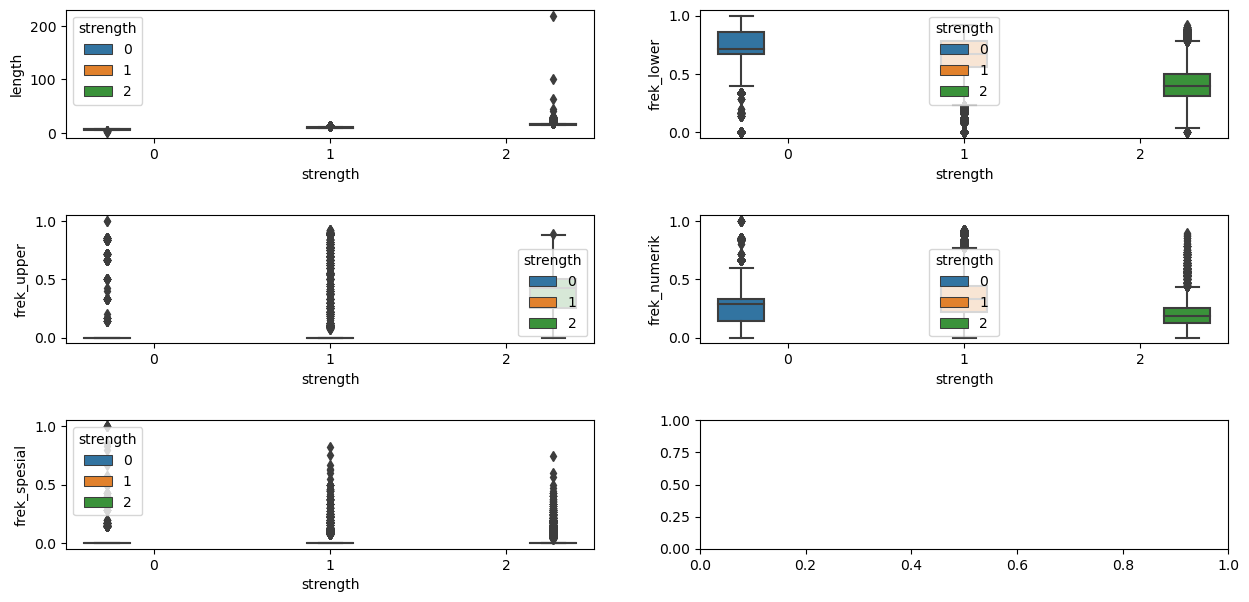

In [47]:
fig , ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2, figsize=(15, 7))
plt.subplots_adjust(hspace=0.6)

sns.boxplot(x="strength", y='length', hue="strength", ax=ax1, data=data)
sns.boxplot(x="strength", y='frek_lower', hue="strength", ax=ax2, data=data)
sns.boxplot(x="strength", y='frek_upper', hue="strength", ax=ax3, data=data)
sns.boxplot(x="strength", y='frek_numerik', hue="strength", ax=ax4, data=data)
sns.boxplot(x="strength", y='frek_spesial', hue="strength", ax=ax5, data=data)

#### Univariate analisis
mengananlisis satu variabel dlu yaitu length atau strength pada password tersebut. mungkin aku mau coba visualisasi baru yaitu violin plot yang menggabungkan konsep dari boxplot dan distribution plot. Dimana distribution plot akan menampilkan kepadatan dari data point

In [48]:
data.columns

Index(['password', 'strength', 'length', 'frek_lower', 'frek_upper',
       'frek_numerik', 'frek_spesial'],
      dtype='object')

In [49]:
def viz_distribusi(data, feature):
    
    plt.figure(figsize=(10, 8))
    plt.subplot(1,2,1) # plot untuk yang kiri
    sns.violinplot(x='strength', y=feature, data=data)
    
    plt.subplot(1,2,2) # plot untuk yang kanan
    sns.distplot(data[data['strength']==0][feature], color="orange", label="0", hist=False)
    sns.distplot(data[data['strength']==1][feature], color="blue", label="1", hist=False)
    sns.distplot(data[data['strength']==2][feature], color="red", label="2", hist=False)
    plt.legend()
    plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

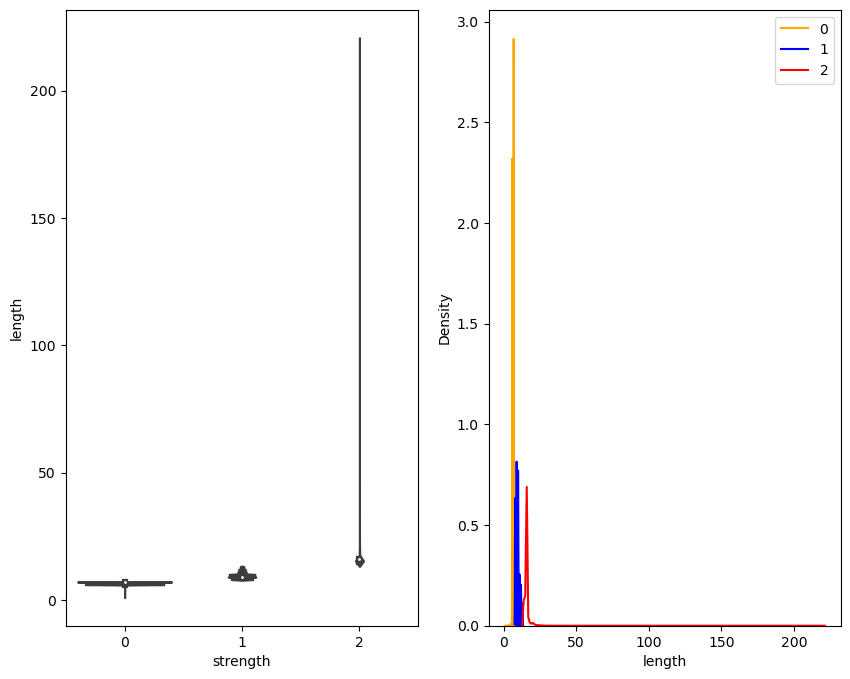

In [50]:
viz_distribusi(data, "length")

Penjelasan mengenai visualisasi violin plot
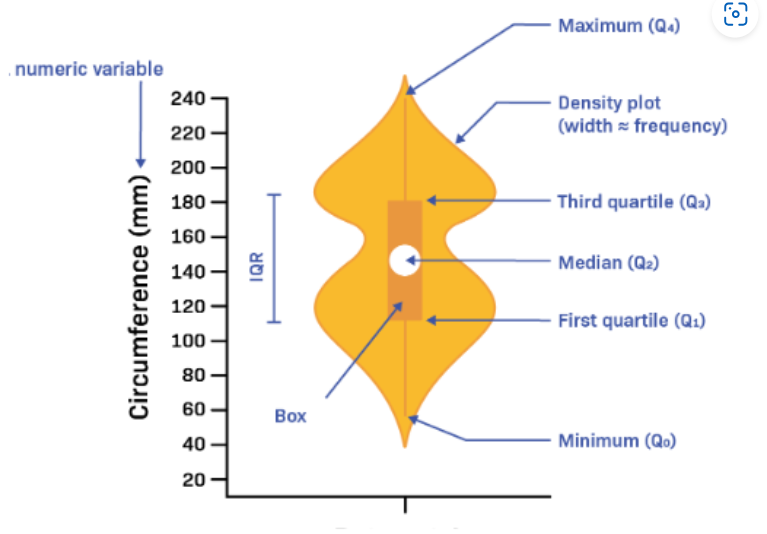

### analisis univariate
Berdasarkan hasil distribusi plot diketahui bahwa:
- kita memiliki beberapa daerah yang tumpang tindih dalam plot distribusi 'length' untuk semua kelas 'strength' (0, 1, 2)
- ketika kelas 'strength' 2 (bisa dilihat di dist dan violin plot), kita memiliki nilai 'length' yang lebih tinggi daripada kelas 'strength' 1 dan 0
- Kesimpulan : artinya 'length' adalah fitur yang menarik karena kita memiliki wilayah yang tumpang tindih yang sangat sedikit

Berdasarkan hasil analisis violin plot maka diketahui bahwa:
- kita dapat mengamati ekor panjang dari kekuatan ketika kelas 'strength' 2, yaitu ketika kelas 'strength' 2 dimana kita memiliki nilai 'length' yang lebih tinggi daripada kelas 'strength' 1 dan 0
- Kita juga memiliki lebih sedikit tumpang tindih untuk semua kelas (liat di dist plot)
- berarti 'length' mungkin luar biasa berguna dalam menentukan 'strength' password

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

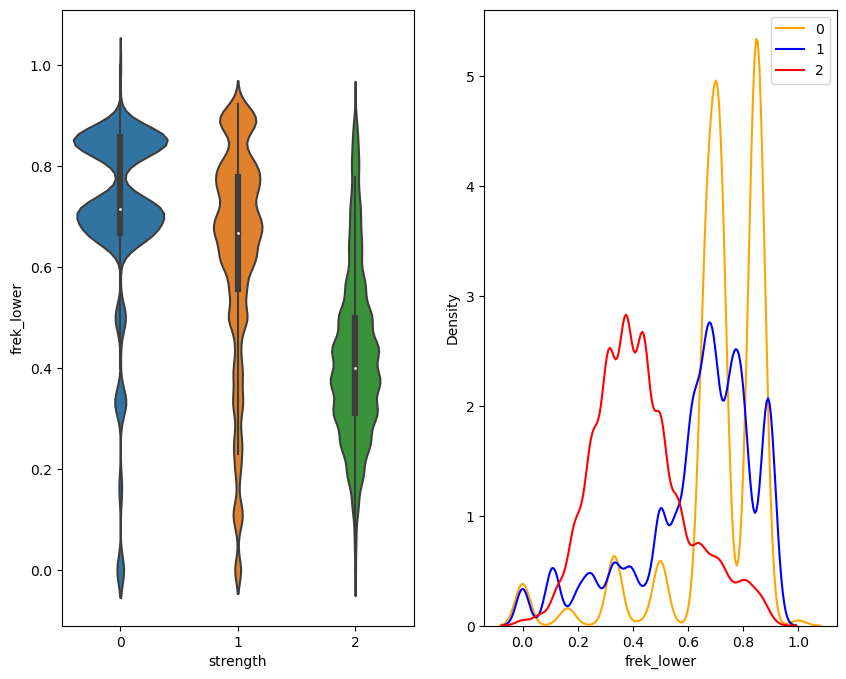

In [51]:
viz_distribusi(data, "frek_lower")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

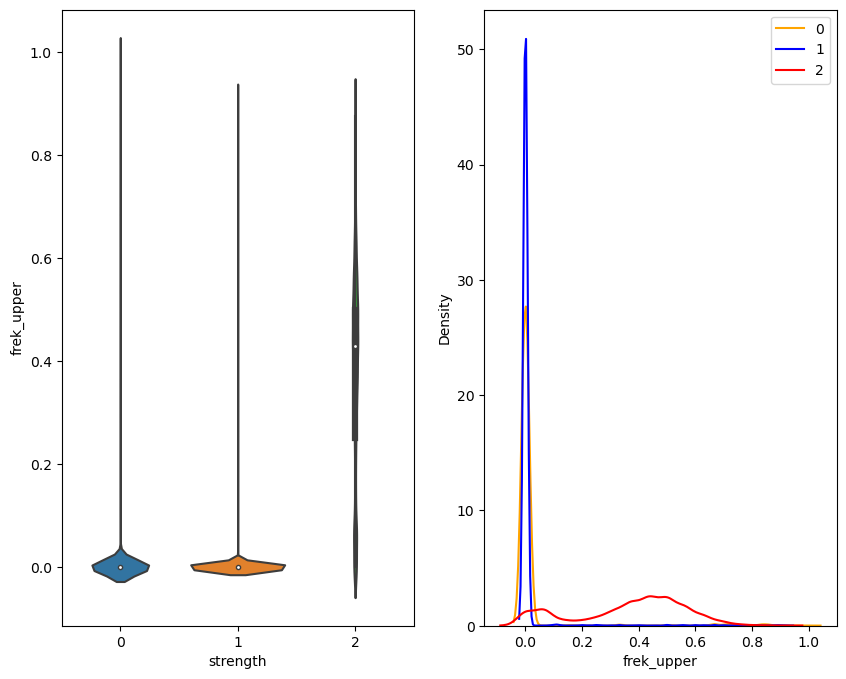

In [52]:
viz_distribusi(data, "frek_upper")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

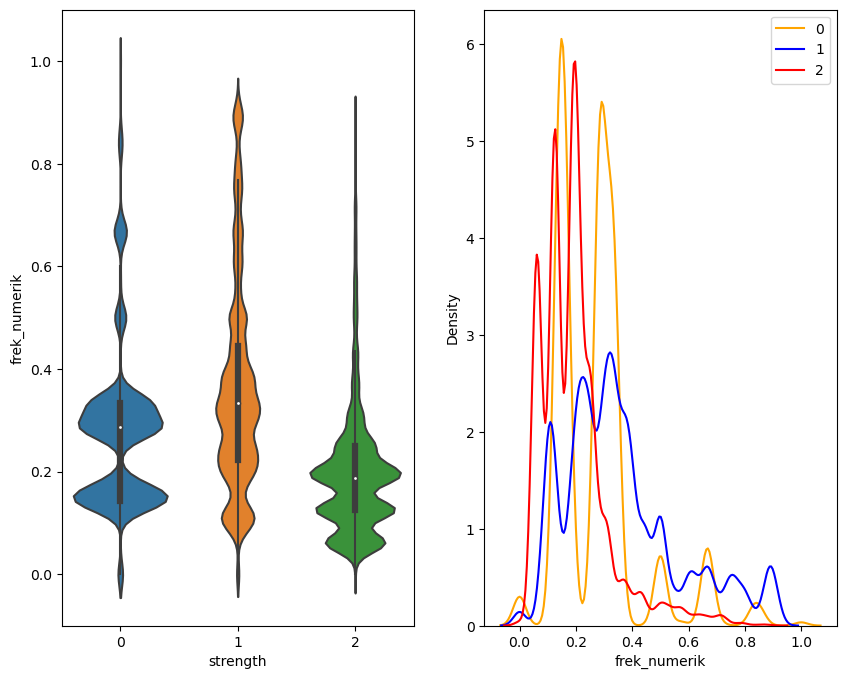

In [53]:
viz_distribusi(data, "frek_numerik")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

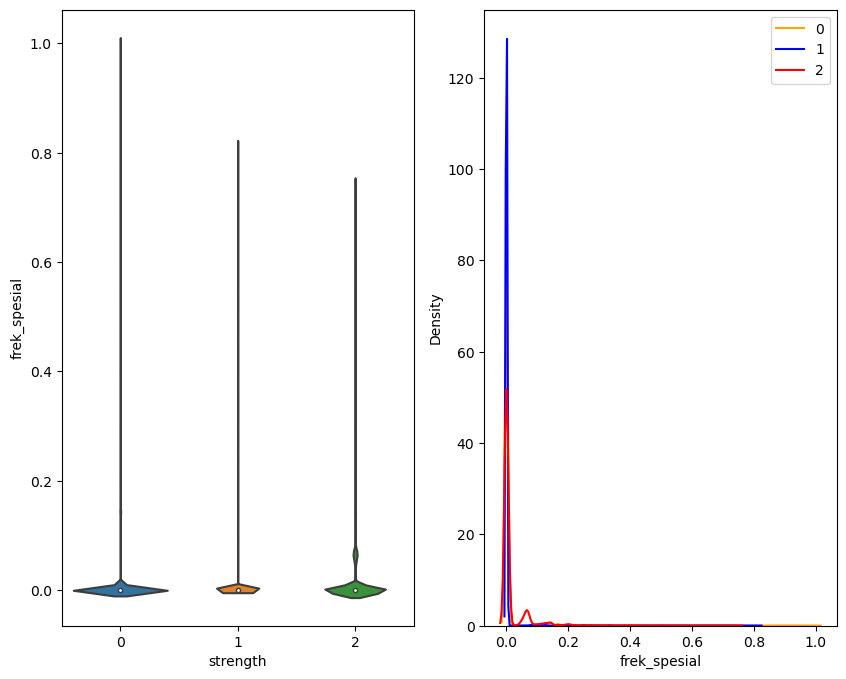

In [54]:
viz_distribusi(data, "frek_spesial")

Jika ternyata dari visualisasi tersebut, baik dari distribusi dan violin plot, jika memiliki tumpang tindih atau overlapping yang cukup banyak maka fitur tersebut sepertinya tidak terlalu berguna.

#### Penerapan NLP dengan TF-IDF (Term Frequency Inverce Document Frequency)
Jadi aku ingin untuk mengubah data text itu menjadi vektor representation 

Rumus: TF * IDF


Jadi si TF-IDF dia akan menentukan seberapa penting dari setiap data yang ada atau setiap baris datanya.

Langkah pertama: Menerapkan operasi lowercase pada data? dikarenakan
 
Langkah kedua: cara mencari nilai TF? dengan menggunakan rumus:

     jumlah dari suatu kata muncul dalam satu dokumen
TF = ----------------------------------------------------------------------------------
    
        jumlah total dari seluruh kata di dokumen

 

Langkah ketiga: mencari IDF dengan menggunakan rumus:

          Total number of document pada suatu data    
IDF = log ( ------------------------------------------------------------------------------------------- )

          number of word document containing particular word

Langkah keempat: mengkalikan TF dan IDF. Sehingga tiap kata itu akan menjadi fitur yang memiliki nilai TF-IDF atau memiliki nilai dari vector representation sehingga siap untuk dimasukkan kedalam mesin algoritma

In [55]:
#shuffle
dataframe = data.sample(frac=1)

In [56]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [57]:
vectorizer = TfidfVectorizer(analyzer="char") # setiap karakter dalam teks akan dianggap sebagai fitur yang akan diekstrak

In [58]:
x = list(dataframe["password"])

In [59]:
# sampel passw
X = vectorizer.fit_transform(x) # list atau array

In [60]:
X.shape

(100000, 99)

In [61]:
# kalau kita bandingin
dataframe["password"].shape

(100000,)

artinya setiap password di X itu diwakili oleh 99 dimensi

In [62]:
X

<100000x99 sparse matrix of type '<class 'numpy.float64'>'
	with 842571 stored elements in Compressed Sparse Row format>

In [63]:
X.toarray()[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.22219823, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.32230537, 0.50134776, 0.        , 0.        , 0.        ,
       0.51951984, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.26293753, 0.        , 0.40531527, 0.        ,
       0.        , 0.30344709, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [64]:
# representasi vektor dari password pertama kita
dataframe['password']

90180           idioteqe1
65838             dudman7
16259    1Ioctvjc0MAw7JTG
61507             wmzdks1
23695         miami2ibiza
               ...       
7649            ahamdku81
40354            mx4jktyp
71726    rrxfoejU1NwMpTqU
10198           jon879136
58845       kinnu143pinnu
Name: password, Length: 100000, dtype: object

nah kita mau nerapin vektor representasi tersebut terhadap setiap baris data

In [65]:
vectorizer.get_feature_names_out()

array(['\x04', '\x06', '\x08', '\x0e', '\x10', '\x11', '\x17', ' ', '!',
       '#', '$', '%', '&', '(', ')', '*', '+', '-', '.', '/', '0', '1',
       '2', '3', '4', '5', '6', '7', '8', '9', ';', '<', '=', '>', '?',
       '@', '[', '\\', ']', '^', '_', '`', 'a', 'b', 'c', 'd', 'e', 'f',
       'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's',
       't', 'u', 'v', 'w', 'x', 'y', 'z', '{', '|', '}', '~', '¡', '¨',
       '°', '±', '³', '´', 'µ', '·', 'ß', 'à', 'á', 'ä', 'æ', 'ç', 'é',
       'ê', 'í', 'ñ', 'ó', 'õ', 'ö', '÷', 'ú', 'ü', 'ý', 'þ', '›'],
      dtype=object)

In [66]:
df2 = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

<IPython.core.display.Javascript object>

In [67]:
df2.head(5)

,,,,,,,,,!,#,...,ñ,ó,õ,ö,÷,ú,ü,ý,þ,›
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Seperti yang diketahui bahw dari hasil analisis itu fitur length dan frek_lower itu sangat penting untuk menentukan seberapa kuat dari password yang ada.

In [68]:
dataframe.columns

Index(['password', 'strength', 'length', 'frek_lower', 'frek_upper',
       'frek_numerik', 'frek_spesial'],
      dtype='object')

In [69]:
df2['length'] = dataframe['length']
df2['frek_lower'] = dataframe['frek_lower']

In [70]:
df2.head(5)

,,,,,,,,,!,#,...,õ,ö,÷,ú,ü,ý,þ,›,length,frek_lower
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9,0.333
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12,0.417
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9,0.778
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,23,0.783
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8,0.625


#### modeling

In [71]:
from sklearn.model_selection import train_test_split

In [72]:
y = dataframe['strength']

In [73]:
X_train, X_test, y_train, y_test = train_test_split(df2, y, test_size=0.25)

In [74]:
X_train.shape

(75000, 101)

In [75]:
from sklearn.linear_model import LogisticRegression

In [76]:
clf = LogisticRegression(multi_class='multinomial') # parameter ini artinya akan menggunakan lebih dari 2 kelas dari target

In [77]:
clf.fit(X_train, y_train)

LogisticRegression(multi_class='multinomial')

In [78]:
y_clf_pred = clf.predict(X_test)

In [79]:
y_clf_pred

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [80]:
from collections import Counter # hitung

In [81]:
# total
Counter(y_clf_pred)

Counter({1: 21076, 2: 2252, 0: 1672})

In [82]:
passwords = 'ant0niusr0n@341'

sample_pass = np.array([passwords])

<IPython.core.display.Javascript object>

In [83]:
sample_matrix = vectorizer.transform(sample_pass)

In [84]:
sample_matrix.toarray() #nilai dari tf idf

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.38307776, 0.14694513, 0.        , 0.19041013, 0.21023947,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.49930498, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.14151343, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.17178559, 0.        , 0.        , 0.        , 0.        ,
        0.54576221, 0.        , 0.        , 0.        , 0.18850534,
        0.19280056, 0.20067699, 0.20377962, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.  

In [85]:
sample_matrix.toarray().shape

(1, 99)

In [86]:
len(passwords)

15

In [87]:
[char for char in passwords if char.islower()]

['a', 'n', 't', 'n', 'i', 'u', 's', 'r', 'n']

In [88]:
len([char for char in passwords if char.islower()])/len(passwords)

0.6

In [89]:
np.append(sample_matrix.toarray(), (15, 0.6))

<IPython.core.display.Javascript object>

array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.38307776,  0.14694513,  0.        ,  0.19041013,  0.21023947,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.49930498,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.14151343,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.17178559,  0.        ,  0.        ,  0.        ,  0.        ,
        0.54576221,  0.        ,  0.        ,  0.        ,  0.18850534,
        0.19280056,  0.20067699,  0.20377962,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.  

In [90]:
np.append(sample_matrix.toarray(), (15, 0.6)).shape

<IPython.core.display.Javascript object>

(101,)

sepertinya kita harus ubah dimensinya supaya siap untuk diprediksi

In [91]:
np.append(sample_matrix.toarray(), (15, 0.6)).reshape(1, 101)

<IPython.core.display.Javascript object>

array([[ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.38307776,  0.14694513,  0.        ,  0.19041013,  0.21023947,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.49930498,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.14151343,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.17178559,  0.        ,  0.        ,  0.        ,  0.        ,
         0.54576221,  0.        ,  0.        ,  0.        ,  0.18850534,
         0.19280056,  0.20067699,  0.20377962,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0. 

In [92]:
np.append(sample_matrix.toarray(), (15, 0.6)).reshape(1, 101).shape

<IPython.core.display.Javascript object>

(1, 101)

In [93]:
matriks_baru = np.append(sample_matrix.toarray(), (15, 0.6)).reshape(1, 101)

<IPython.core.display.Javascript object>

In [94]:
clf.predict(matriks_baru)

array([2], dtype=int64)

hasil prediksi membuktikan bahwa passwords itu sangat kuat

In [95]:
def prediksi():
    sandi = input("Masukkan sandi anda: ")
    sample_arr = np.array([sandi]) #jadi array
    sample_matrix = vectorizer.transform(sample_arr) # tf idf
    
    panjang_pass = len(sandi)
    panjang_normalized_lower = len([char for char in sandi if char.islower()])/len(sandi)
    
    matriks_baruu = np.append(sample_matrix.toarray(), (panjang_pass, panjang_normalized_lower)).reshape(1, 101)
    
    hasil = clf.predict(matriks_baruu)
    
    if hasil == 0:
        return "Kekuatan Kata sandi anda terlalu lemah"
    elif hasil == 1:
        return "Kekuatan Kata sandi anda biasa aja"
    elif hasil == 2:
        return "Kekuatan Kata sandi anda sudah cukup kuat"

In [96]:
prediksi()

Masukkan sandi anda: ekarl33@


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

'Kekuatan Kata sandi anda terlalu lemah'

In [97]:
prediksi()

Masukkan sandi anda: aA03nti@i


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

'Kekuatan Kata sandi anda sudah cukup kuat'

#### Evaluasi

In [98]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [99]:
accuracy_score(y_test, y_clf_pred)

0.79916

In [100]:
confusion_matrix(y_test, y_clf_pred)

# lihat  true prediction secara diagonal

array([[  850,  2525,     8],
       [  718, 17333,   448],
       [  104,  1218,  1796]], dtype=int64)

1. artinya ada 1024 data point dimana model memprediksi 'strength' = 0 secara benar dan hasil aslinya juga benar (true positifnya)
2. 17222 artinya model memprediksi 'strength' = 1 dan hasil aslinya juga benar yaitu 1
3. ada 1974 data point dimana model prediksi 'strength' = 2 dan ternyata itu benar

Seperti yang diketahui bahwa data test itu berjumlah 25% atau 25 ribu data point. Dimana ketiga hasil diatas cukup mendekati kearah 25 ribu data poin

In [101]:
print(classification_report(y_test, y_clf_pred))

              precision    recall  f1-score   support

           0       0.51      0.25      0.34      3383
           1       0.82      0.94      0.88     18499
           2       0.80      0.58      0.67      3118

    accuracy                           0.80     25000
   macro avg       0.71      0.59      0.63     25000
weighted avg       0.78      0.80      0.78     25000



#### mencoba mencari model yang lebih baik

In [102]:
from sklearn.linear_model import LogisticRegressionCV

In [103]:
clf_cv = LogisticRegressionCV(cv=5, multi_class="multinomial", random_state=5)

In [104]:
clf_cv.fit(X_train, y_train)

LogisticRegressionCV(cv=5, multi_class='multinomial', random_state=5)

In [105]:
y_clf_cv_pred = clf_cv.predict(X_test)

In [106]:
accuracy_score(y_test, y_clf_cv_pred)

0.81716

In [107]:
print(classification_report(y_test, y_clf_cv_pred))

              precision    recall  f1-score   support

           0       0.56      0.30      0.39      3383
           1       0.84      0.93      0.88     18499
           2       0.82      0.69      0.75      3118

    accuracy                           0.82     25000
   macro avg       0.74      0.64      0.67     25000
weighted avg       0.80      0.82      0.80     25000



In [108]:
from sklearn.ensemble import RandomForestClassifier

In [109]:
clf_rfc = RandomForestClassifier(n_estimators=100)

In [110]:
clf_rfc.fit(X_train, y_train)

RandomForestClassifier()

In [111]:
y_rfc_pred = clf_rfc.predict(X_test)

In [112]:
accuracy_score(y_test, y_rfc_pred)

0.93004

In [113]:
print(classification_report(y_test, y_rfc_pred))

              precision    recall  f1-score   support

           0       0.92      0.69      0.79      3383
           1       0.93      0.98      0.95     18499
           2       0.95      0.88      0.92      3118

    accuracy                           0.93     25000
   macro avg       0.93      0.85      0.89     25000
weighted avg       0.93      0.93      0.93     25000



In [117]:
path = 'C:/Users/Asus/dataset/pasword/'

nama_file2 = 'password_siap_latih.csv'

full_path2 = path + nama_file2

df2.to_csv(full_path2, index=False)

print(f"Data berhasil disimpan ke: {full_path2}")

Data berhasil disimpan ke: C:/Users/Asus/dataset/pasword/password_siap_latih.csv


In [118]:
import pickle

In [120]:
model_path = 'C:/Users/Asus/dataset/pasword/RF_prediksi_sandi.pkl'
with open(model_path, 'wb') as f:
    pickle.dump(clf_rfc, f)
    
# output: 144 mb